In [1]:
from sympy import *
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import os
import pandas as pd
import fenics as fe
import dill
import Compressible as Comp

In [7]:
# Test Parameter
ConstitutiveModels = ['NeoHookean']
StretchRange  = [0.1, 5.0]                   # Stretch ratio interval
DeltaStretch  =  0.01                        # Step size


# Material Parameters
LambdaValue =  1E6   # 1st Lamé parameter
MuValue     =  660   # 2nd Lamé parameter (Shear modulus) (Pa)

C01Value    =  0.00  # Mooney-Rivlin 3rd material constant (Pa) if == 0 => Neo-Hookean
JmValue     =  0.08  # Gent 3rd material constant (-) if == 1 => ~Neo-Hookean with ln
BetaValue   =  20.3  # Demiray 3rd material constant (-) if == 1 => ~Neo-Hookean with exp
AlphaValue  = -24.3  # Ogden 3rd material constant (-) if == 2 => Neo-Hookean

Output_Path = os.path.join('Results', 'Compressible')

In [14]:
StretchArray = np.arange(StretchRange[0],StretchRange[1],StretchDelta)
AnalyticalStress = pd.DataFrame({'Stretch ratio (-)':StretchArray})

for ConstitutiveModel in ConstitutiveModels:

    if ConstitutiveModel == ConstitutiveModels[0]:                            # Neo-Hookean
        StressValues = Comp.StressComputation(StretchArray, LambdaValue, MuValue)
        AnalyticalStress[ConstitutiveModel + ' Stress (Pa)'] = StressValues[0]

#     elif ConstitutiveModel == ConstitutiveModels[1]:                          # Mooney-Rivlin
#         StressValues = AnalyticalFunction(C01V, LambdaV, MuV, StretchSteps)
#         AnalyticalStress[ConstitutiveModel + ' Stress (Pa)'] = StressValues

#     elif ConstitutiveModel == ConstitutiveModels[2]:                          # Gent
#         StressValues = AnalyticalFunction(JmV, LambdaV, MuV, StretchSteps)
#         AnalyticalStress[ConstitutiveModel + ' Stress (Pa)'] = StressValues

#     elif ConstitutiveModel == ConstitutiveModels[3]:                          # Demiray
#         StressValues = AnalyticalFunction(BetaV, LambdaV, MuV, StretchSteps)
#         AnalyticalStress[ConstitutiveModel + ' Stress (Pa)'] = StressValues

#     elif ConstitutiveModel == ConstitutiveModels[4]:                          # Ogden
#         StressValues = AnalyticalFunction(AlphaV, LambdaV, MuV, StretchSteps)
#         AnalyticalStress[ConstitutiveModel + ' Stress (Pa)'] = StressValues
        

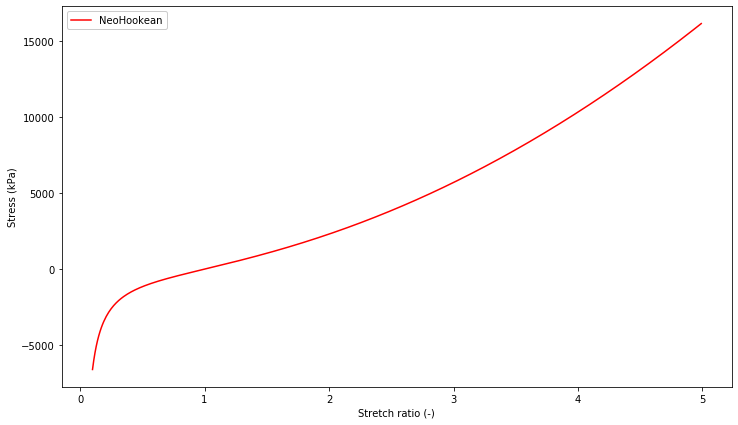

In [16]:
# Plot Results
Columns = AnalyticalStress.columns
Colors = ['Black','Red','Blue','Green','Magenta','Cyan']
Figure, Axes  = plt.subplots(1, figsize=(12,7))
for Index in np.arange(1,len(Columns)):
    Column = Columns[Index]
    Color = Colors[Index]
    Axes.plot(AnalyticalStress[Columns[0]], AnalyticalStress[Column], color = Color, linestyle = '-', label=Column.split()[0])
Axes.set_xlabel('Stretch ratio (-)')
Axes.set_ylabel('Stress (kPa)')
# Axes.set_xlim([0.85,1.15])
# Axes.set_ylim([-2E3,2E3])
plt.legend(loc='upper left', frameon=True, framealpha=1)
# plt.savefig(os.path.join(Output_Path, FileName + '_Comparison.pdf'))
plt.show()